# 🔄 Oversampling para Balance de Clases

Este notebook implementa técnicas de oversampling para balancear el dataset de vibración con clases desbalanceadas.

**Estado actual del dataset:**
- N1: 1,177 muestras (52.7%)
- N2: 801 muestras (35.9%)
- N3: 256 muestras (11.5%)
- **Ratio de desbalance:** 4.60:1

## 📋 Estrategias a explorar:

1. **SMOTE** - Synthetic Minority Oversampling Technique
2. **ADASYN** - Adaptive Synthetic Sampling
3. **BorderlineSMOTE** - SMOTE para casos límite
4. **RandomOverSampler** - Duplicación aleatoria (baseline)

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Librerías para oversampling
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("📚 Librerías de oversampling cargadas")

📚 Librerías de oversampling cargadas


In [14]:
Counter(['manzana', 'banana', 'manzana', 'naranja', 'banana',
   'manzana'])

Counter({'manzana': 3, 'banana': 2, 'naranja': 1})

In [4]:
# Cargar datos originales
df = pd.read_csv('../data/ARR3_DF_FINAL_preserved.csv')

print("📊 DATOS ORIGINALES")
print("=" * 40)
print(f"Dimensiones: {df.shape}")

# Preparar datos para oversampling
# Separar características (X) y etiquetas (y)
X = df.drop(['Nivel_Dano'], axis=1)  # Todas las columnas excepto la etiqueta
y = df['Nivel_Dano']  # Solo la etiqueta

print(f"\nCaracterísticas (X): {X.shape}")
print(f"Etiquetas (y): {y.shape}")

# Mostrar distribución original
print(f"\n🎯 DISTRIBUCIÓN ORIGINAL:")
original_counts = Counter(y)
total_samples = len(y)

for clase, count in sorted(original_counts.items()):
    percentage = (count / total_samples) * 100
    print(f"   {clase}: {count:,} muestras ({percentage:.1f}%)")

print(f"\nRatio de desbalance: {max(original_counts.values()) / min(original_counts.values()):.2f}:1")

📊 DATOS ORIGINALES
Dimensiones: (2234, 327)

Características (X): (2234, 326)
Etiquetas (y): (2234,)

🎯 DISTRIBUCIÓN ORIGINAL:
   N1: 1,177 muestras (52.7%)
   N2: 801 muestras (35.9%)
   N3: 256 muestras (11.5%)

Ratio de desbalance: 4.60:1


## 🎯 Implementación de SMOTE

**SMOTE (Synthetic Minority Oversampling Technique)** genera muestras sintéticas mediante:

1. **Selección de vecinos**: Para cada muestra minoritaria, encuentra sus k vecinos más cercanos
2. **Interpolación**: Crea nuevos puntos entre la muestra original y sus vecinos  
3. **Balanceado**: Genera suficientes muestras sintéticas para equilibrar las clases

**Ventajas:**
- ✅ Crea muestras realistas (no duplicados exactos)
- ✅ Preserva la estructura de los datos
- ✅ Funciona bien con datos numéricos continuos

In [7]:
# Implementar SMOTE para balancear las clases
print("🔄 APLICANDO SMOTE")
print("=" * 30)

# Configurar SMOTE
smote = SMOTE(
    sampling_strategy='auto',  # Balancea automáticamente todas las clases minoritarias
    k_neighbors=5,             # Número de vecinos más cercanos
    random_state=42            # Para reproducibilidad
)

print("⚙️  Configuración SMOTE:")
print(f"   • Estrategia: {smote.sampling_strategy}")
print(f"   • K-vecinos: {smote.k_neighbors}")
print(f"   • Random state: {smote.random_state}")

# Aplicar SMOTE
print("\n🔄 Generando muestras sintéticas...")
X_smote, y_smote = smote.fit_resample(X, y)

print("✅ SMOTE aplicado exitosamente!")

# Comparar distribuciones
print(f"\n📊 COMPARACIÓN DE DISTRIBUCIONES:")
print(f"{'Clase':<8} {'Original':<15} {'Después SMOTE':<15} {'Diferencia':<12}")
print("-" * 60)

smote_counts = Counter(y_smote)
total_smote = len(y_smote)

for clase in sorted(original_counts.keys()):
    orig_count = original_counts[clase]
    smote_count = smote_counts[clase]
    diff = smote_count - orig_count
    
    orig_pct = (orig_count / total_samples) * 100
    smote_pct = (smote_count / total_smote) * 100
    
    orig_str = f"{orig_count:,} ({orig_pct:.1f}%)"
    smote_str = f"{smote_count:,} ({smote_pct:.1f}%)"
    diff_str = f"+{diff:,}"
    
    print(f"{clase:<8} {orig_str:<15} {smote_str:<15} {diff_str:<12}")

# Calcular nuevo ratio de balance
new_ratio = max(smote_counts.values()) / min(smote_counts.values())
print(f"\n⚖️  NUEVO BALANCE:")
print(f"   • Ratio original: {max(original_counts.values()) / min(original_counts.values()):.2f}:1")
print(f"   • Ratio después SMOTE: {new_ratio:.2f}:1")
print(f"   • Mejora: {((max(original_counts.values()) / min(original_counts.values())) / new_ratio):.1f}x más balanceado")

🔄 APLICANDO SMOTE
⚙️  Configuración SMOTE:
   • Estrategia: auto
   • K-vecinos: 5
   • Random state: 42

🔄 Generando muestras sintéticas...
✅ SMOTE aplicado exitosamente!

📊 COMPARACIÓN DE DISTRIBUCIONES:
Clase    Original        Después SMOTE   Diferencia  
------------------------------------------------------------
N1       1,177 (52.7%)   1,177 (33.3%)   +0          
N2       801 (35.9%)     1,177 (33.3%)   +376        
N3       256 (11.5%)     1,177 (33.3%)   +921        

⚖️  NUEVO BALANCE:
   • Ratio original: 4.60:1
   • Ratio después SMOTE: 1.00:1
   • Mejora: 4.6x más balanceado


In [10]:
# Guardar dataset balanceado
print("💾 GUARDANDO DATASET BALANCEADO")
print("=" * 35)

# Combinar características y etiquetas balanceadas
df_balanced = pd.DataFrame(X_smote, columns=X.columns)
df_balanced['Nivel_Dano'] = y_smote.copy()

# Guardar como CSV
output_path = '../data/ARR3_DF_BALANCED_SMOTE.csv'
df_balanced.to_csv(output_path, index=False)

print(f"✅ Dataset balanceado guardado en: {output_path}")
print(f"📊 Nuevas dimensiones: {df_balanced.shape}")

# Resumen final
print(f"\n📈 RESUMEN FINAL:")
print(f"   • Muestras originales: {len(y):,}")
print(f"   • Muestras después SMOTE: {len(y_smote):,}")  
print(f"   • Muestras sintéticas generadas: {len(y_smote) - len(y):,}")
print(f"   • Incremento: {((len(y_smote) / len(y)) - 1) * 100:.1f}%")

# Verificar balance final
balance_status = "🟢 BALANCEADO" if new_ratio <= 1.5 else "🟡 MEJORADO"
print(f"   • Estado final: {balance_status}")

💾 GUARDANDO DATASET BALANCEADO


/var/folders/64/m87yf3yx7zngv12wrzgqgj_w0000gn/T/ipykernel_73599/1280466369.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced['Nivel_Dano'] = y_smote.copy()


✅ Dataset balanceado guardado en: ../data/ARR3_DF_BALANCED_SMOTE.csv
📊 Nuevas dimensiones: (3531, 327)

📈 RESUMEN FINAL:
   • Muestras originales: 2,234
   • Muestras después SMOTE: 3,531
   • Muestras sintéticas generadas: 1,297
   • Incremento: 58.1%
   • Estado final: 🟢 BALANCEADO


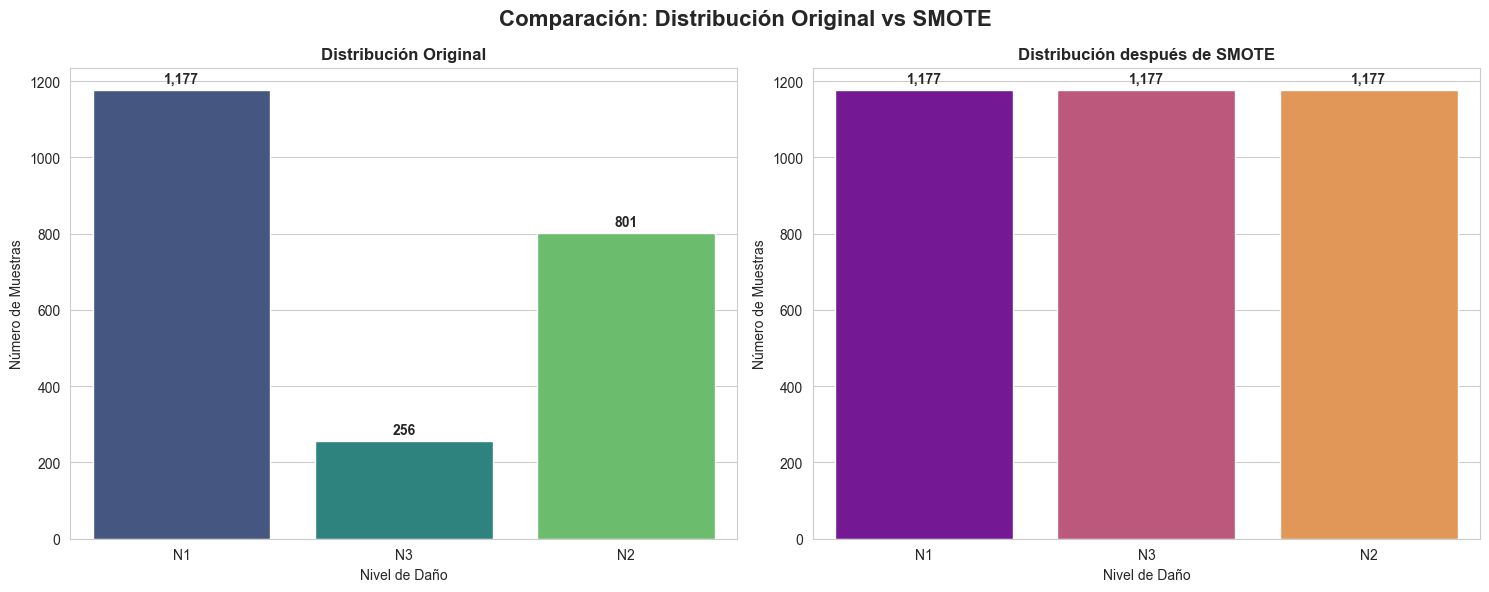


⚖️  NUEVO BALANCE:
   • Ratio original: 4.60:1
   • Ratio después SMOTE: 1.00:1
   • Mejora: 4.6x más balanceado


In [11]:
# Visualizar el impacto de SMOTE con gráficos de SEABORN
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparación: Distribución Original vs SMOTE', fontsize=16, fontweight='bold')

# Datos para gráficos
original_data = pd.DataFrame({
    'Clase': list(original_counts.keys()),
    'Cantidad': list(original_counts.values()),
    'Tipo': 'Original'
})

smote_data = pd.DataFrame({
    'Clase': list(smote_counts.keys()),
    'Cantidad': list(smote_counts.values()),
    'Tipo': 'SMOTE'
})

# Gráfico 1: Distribución Original
sns.barplot(data=original_data, x='Clase', y='Cantidad', ax=axes[0], 
            hue='Clase', palette='viridis', legend=False)
axes[0].set_title('Distribución Original', fontweight='bold')
axes[0].set_xlabel('Nivel de Daño')
axes[0].set_ylabel('Número de Muestras')

# Agregar etiquetas
for i, v in enumerate(original_data['Cantidad']):
    axes[0].text(i, v + max(original_data['Cantidad']) * 0.01, f'{v:,}', 
                ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Distribución después de SMOTE
sns.barplot(data=smote_data, x='Clase', y='Cantidad', ax=axes[1], 
            hue='Clase', palette='plasma', legend=False)
axes[1].set_title('Distribución después de SMOTE', fontweight='bold')
axes[1].set_xlabel('Nivel de Daño')
axes[1].set_ylabel('Número de Muestras')

# Agregar etiquetas
for i, v in enumerate(smote_data['Cantidad']):
    axes[1].text(i, v + max(smote_data['Cantidad']) * 0.01, f'{v:,}', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calcular nuevo ratio de balance
new_ratio = max(smote_counts.values()) / min(smote_counts.values())
print(f"\n⚖️  NUEVO BALANCE:")
print(f"   • Ratio original: {max(original_counts.values()) / min(original_counts.values()):.2f}:1")
print(f"   • Ratio después SMOTE: {new_ratio:.2f}:1")
print(f"   • Mejora: {((max(original_counts.values()) / min(original_counts.values())) / new_ratio):.1f}x más balanceado")